# Visualizing categorical data uncertainty with **bootplot**

In this notebook, we demonstrate how **bootplot** can be used to obtain black-box uncertainty visualizations when dealing with categorical data.
We show examples using bar charts and pie charts.

In [1]:
import numpy as np
from bootplot import bootplot
import matplotlib.pyplot as plt

We will use a small toy dataset with 7 ground truth classes and 50 samples.

In [2]:
np.random.seed(0)
data = np.random.binomial(7, 0.3, 50)
n_classes = 7

We first create basic plots of our data.

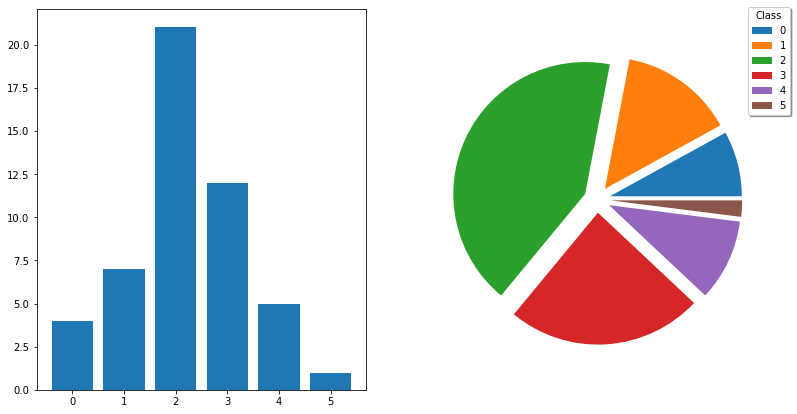

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7))
labels, counts = np.unique(data, return_counts=True)
axes[0].bar(labels, counts)
wedges, _ = axes[1].pie(counts, explode=0.1 * np.ones(len(labels)))
axes[1].legend(
    wedges,
    list(range(len(labels))),
    loc='upper right',
    bbox_to_anchor=(1.1, 1.1, 0, 0),
    shadow=True,
    title='Class'
)
plt.show()

## Defining the task and plot

We wish to find the uncertainty of the class distribution. Since we know how to plot our data, we simply move this code into a plotting function and pass it to **bootplot**. This will make visualizing uncertainty simple. In the pie chart example, it is not easy to visualize uncertainty with error bars, but we can avoid these problems with **bootplot**.

Note that there are minor changes in the pie chart function because a random sample might not always contain all classes. This may cause labels to overlap in the legend because of its implementation in matplotlib. To get around this, we fill the remaining class counts with 0.

In [4]:
def target_distribution_bar_chart(data_subset, data_full, ax):
    ax.bar(*np.unique(data_subset, return_counts=True))

In [5]:
def target_distribution_pie_chart(data_subset, data_full, ax):
    # Handle potentially missing classes in the subset
    subset_labels, subset_counts = np.unique(data_subset, return_counts=True)
    values = np.zeros((n_classes,))
    values[subset_labels] = subset_counts

    # Plot the pie chart and its legend
    subset_labels = np.arange(n_classes)
    subset_counts = values

    wedges, _ = ax.pie(x=subset_counts, explode=0.9 * np.ones(len(subset_labels)))

    ax.legend(
        wedges,
        list(range(len(subset_labels))),
        loc='upper right',
        bbox_to_anchor=(1.1, 1.1, 0, 0),
        shadow=True,
        title='Class'
    )

## Running bootplot

In [6]:
bar_chart_image = bootplot(
    target_distribution_bar_chart,
    data,
    xlim=(-1, n_classes),
    ylim=(0, 35)
)

In [7]:
pie_chart_image = bootplot(
    target_distribution_pie_chart,
    data,
    m=1000,
    xlim=(-3, 3),
    ylim=(-3, 3)
)

## Visualizing the result

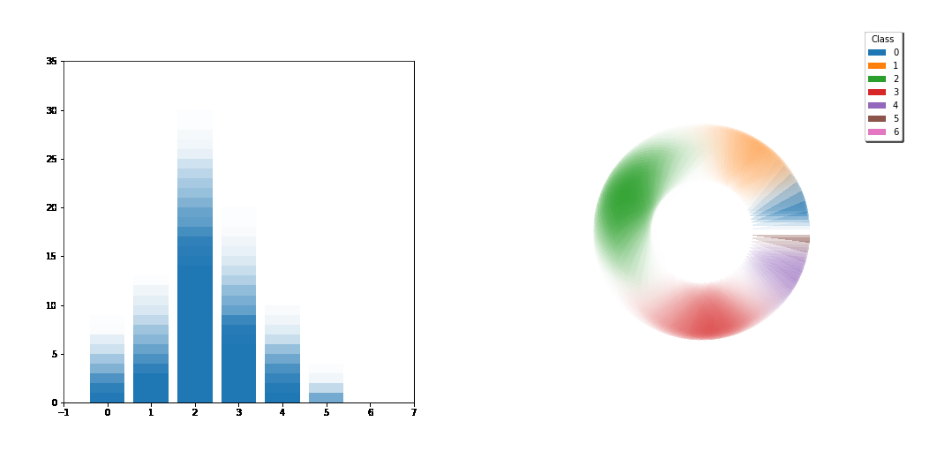

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7))

axes[0].imshow(bar_chart_image)
axes[0].axis('off')
axes[1].imshow(pie_chart_image)
axes[1].axis('off')
fig.tight_layout()

plt.show()